In [ ]:
import pandas as pd

In [ ]:
laptop=pd.read_csv('/content/Laptop_price.csv')



print(laptop.describe())

       Processor_Speed     RAM_Size  Storage_Capacity  Screen_Size  \
count      1000.000000  1000.000000       1000.000000  1000.000000   
mean          2.750611    15.500000        584.576000    14.056790   
std           0.731796    10.988665        313.438517     1.705882   
min           1.511580     4.000000        256.000000    11.012111   
25%           2.089246     8.000000        256.000000    12.635523   
50%           2.760885    16.000000        512.000000    14.099643   
75%           3.362610    32.000000       1000.000000    15.528590   
max           3.998534    32.000000       1000.000000    16.985737   

            Weight         Price  
count  1000.000000   1000.000000  
mean      3.466919  19604.187963  
std       0.866541   9406.064880  
min       2.000560   8570.012950  
25%       2.717211  10114.012948  
50%       3.464630  17287.241878  
75%       4.212583  31566.214754  
max       4.990728  33503.935037  


In [ ]:
print(laptop.dtypes)
print("shape",laptop.shape)

Brand                object
Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               float64
dtype: object
shape (1000, 7)


In [ ]:
l=laptop.drop('Brand',axis=1)


In [ ]:
print(l.isnull().sum())

Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64


In [ ]:
t=l['Storage_Capacity'].isnull().sum()/l.shape[0]

In [ ]:
y=l['Price']
x=l.drop('Price',axis=1)

In [ ]:
x=x.fillna(0)

In [ ]:
print(x)
print(y)

     Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight
0           3.830296        16               512    11.185147  2.641094
1           2.912833         4              1000    11.311372  3.260012
2           3.241627         4               256    11.853023  2.029061
3           3.806248        16               512    12.280360  4.573865
4           3.268097        32              1000    14.990877  4.193472
..               ...       ...               ...          ...       ...
995         3.343584         4              1000    12.587095  3.162399
996         2.780555         8               256    12.679356  3.750265
997         3.200569         4               512    12.666315  3.392612
998         1.604182         8               256    11.215581  3.857613
999         1.711980         4               256    16.561498  3.440883

[1000 rows x 5 columns]
0      17395.093065
1      31607.605919
2       9291.023542
3      17436.728334
4      32917.990718
           

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.isnull())

print(x_train)

     Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  Weight
29             False     False             False        False   False
535            False     False             False        False   False
695            False     False             False        False   False
557            False     False             False        False   False
836            False     False             False        False   False
..               ...       ...               ...          ...     ...
106            False     False             False        False   False
270            False     False             False        False   False
860            False     False             False        False   False
435            False     False             False        False   False
102            False     False             False        False   False

[800 rows x 5 columns]
     Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight
29          3.799639         8              1000    12.853007  2

In [ ]:
print(x_test)

     Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight
521         3.328974        32               256    16.289694  2.731406
737         2.181560         8              1000    12.993233  2.099804
740         1.952873        16               256    14.822568  2.189390
660         3.223817         4               256    13.025896  4.778616
411         2.614757        16              1000    12.670745  4.226881
..               ...       ...               ...          ...       ...
408         2.721608        32               512    14.172347  3.875990
332         2.431721         8               256    11.251913  3.589911
208         3.516403        32               256    12.260176  3.169699
613         3.670678        32              1000    11.758139  3.069714
78          1.563466        32               512    16.488387  2.507185

[200 rows x 5 columns]


In [ ]:
print(y_train)

29     31747.604606
535    17515.915181
695    17073.491966
557    18399.777107
836    17787.920193
           ...     
106    10711.444213
270    32205.991801
860    31500.579122
435     9059.269729
102    10462.141839
Name: Price, Length: 800, dtype: float64


In [ ]:
print(y_test)

521    10900.502075
737    31727.516697
740     9636.022750
660     9412.599857
411    31641.105861
           ...     
408    17768.373308
332     9411.265536
208    10474.260991
613    32968.612111
78     18310.413806
Name: Price, Length: 200, dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
yp=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
print(mean_absolute_error(y_test,yp))

12884209.297559839


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 178.97357103949275
Mean Absolute Error (MAE): 145.45149030596272


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 32031.539130628356


In [ ]:
from sklearn.metrics import r2_score

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)

Accuracy: 0.9996472163447738


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
yc=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
print(mean_absolute_error(y_test,yc))

12884209.297559839


In [ ]:
yc=model.predict(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
print(mean_absolute_error(y_train,yc))

13096236.448429449


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(mean_squared_error(y_train,yc))

219875847700402.16


In [ ]:
print(model.intercept_)

8874.614594680339


In [ ]:
print(model.coef_)


[ 4.95561936e+02  1.41389972e+03  2.23062627e+04  1.17546539e+02
 -2.19588323e+01]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

KNN


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
print("KNN RMSE:", knn_rmse)

KNN RMSE: 341.92566172228726


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Squared Error (MSE)
knn_mse = mean_squared_error(y_test, knn_predictions)
print("KNN Mean Squared Error (MSE):", knn_mse)

# Calculate Mean Absolute Error (MAE)
knn_mae = mean_absolute_error(y_test, knn_predictions)
print("KNN Mean Absolute Error (MAE):", knn_mae)


KNN Mean Squared Error (MSE): 116913.15814422403
KNN Mean Absolute Error (MAE): 202.9321905661779


SVM


In [ ]:
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
print("SVM RMSE:", svm_rmse)

SVM RMSE: 9686.513309561777


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Squared Error (MSE)
svm_mse = mean_squared_error(y_test, svm_predictions)
print("SVM Mean Squared Error (MSE):", svm_mse)

# Calculate Mean Absolute Error (MAE)
svm_mae = mean_absolute_error(y_test, svm_predictions)
print("SVM Mean Absolute Error (MAE):", svm_mae)


SVM Mean Squared Error (MSE): 93828540.09631744
SVM Mean Absolute Error (MAE): 7900.957594400588


In [ ]:
from sklearn.metrics import r2_score

# Predict on the test set
svm_predictions = svm_model.predict(X_test_scaled)

# Calculate R-squared (R^2) score
svm_r2 = r2_score(y_test, svm_predictions)
print("SVM Accuracy", svm_r2)

SVM Accuracy -0.03339321924936023


KNN Graph

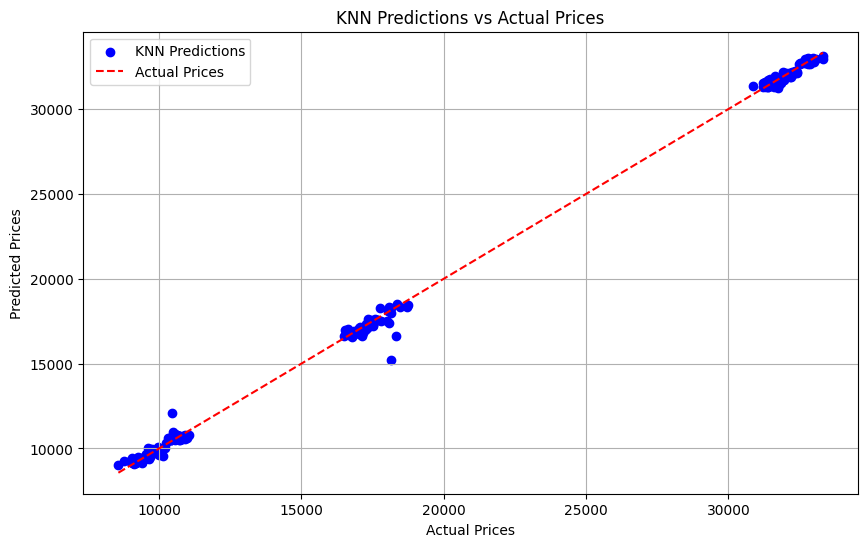

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions, color='blue', label='KNN Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Prices')
plt.title('KNN Predictions vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

SVM Graph

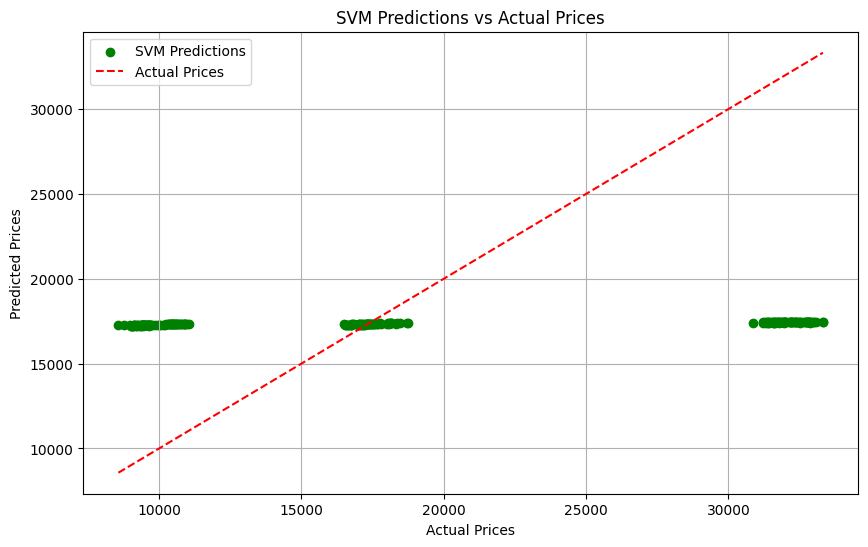

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_predictions, color='green', label='SVM Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Prices')
plt.title('SVM Predictions vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Decision tree

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
print("Decision Tree RMSE:", dt_rmse)

Decision Tree RMSE: 267.78294441917456


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Squared Error (MSE)
dt_mse = mean_squared_error(y_test, dt_predictions)
print("Decision Tree Mean Squared Error (MSE):", dt_mse)

# Calculate Mean Absolute Error (MAE)
dt_mae = mean_absolute_error(y_test, dt_predictions)
print("Decision Tree Mean Absolute Error (MAE):", dt_mae)


Decision Tree Mean Squared Error (MSE): 71707.70532180271
Decision Tree Mean Absolute Error (MAE): 217.10591570521402


In [ ]:
from sklearn.metrics import r2_score

# Predict on the test set
dt_predictions = dt_model.predict(X_test_scaled)

# Calculate R-squared (R^2) score
dt_r2 = r2_score(y_test, dt_predictions)
print("Decision Tree Accuracy", dt_r2)


Decision Tree Accuracy 0.9992102375634171


Decision Tree graph

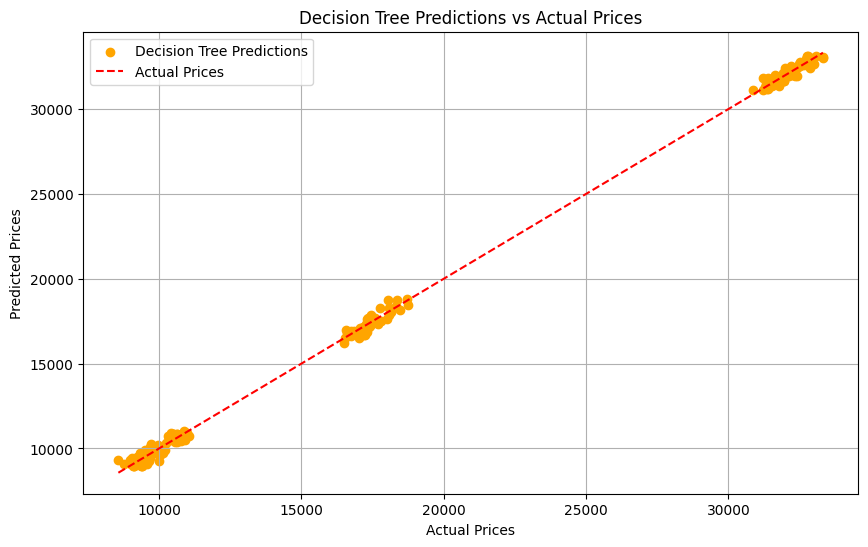

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_predictions, color='orange', label='Decision Tree Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Prices')
plt.title('Decision Tree Predictions vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Calculate the correlation coefficient between Processor_Speed and Price
processor_speed_corr = laptop['Processor_Speed'].corr(laptop['Price'])

# Calculate the correlation coefficient between RAM_Size and Price
ram_size_corr = laptop['RAM_Size'].corr(laptop['Price'])

# Calculate the correlation coefficient between Storage_Capacity and Price
storage_capacity_corr = laptop['Storage_Capacity'].corr(laptop['Price'])

# Calculate the correlation coefficient between Screen_Size and Price
screen_size_corr = laptop['Screen_Size'].corr(laptop['Price'])

# Calculate the correlation coefficient between Weight and Price
weight_corr = laptop['Weight'].corr(laptop['Price'])

print("Correlation between Processor_Speed and Price:", processor_speed_corr)
print("Correlation between RAM_Size and Price:", ram_size_corr)
print("Correlation between Storage_Capacity and Price:", storage_capacity_corr)
print("Correlation between Screen_Size and Price:", screen_size_corr)
print("Correlation between Weight and Price:", weight_corr)

Correlation between Processor_Speed and Price: -0.05073733179930883
Correlation between RAM_Size and Price: 0.061236737840336224
Correlation between Storage_Capacity and Price: 0.9979078468024505
Correlation between Screen_Size and Price: -0.026739766069483688
Correlation between Weight and Price: 0.03841662982443304


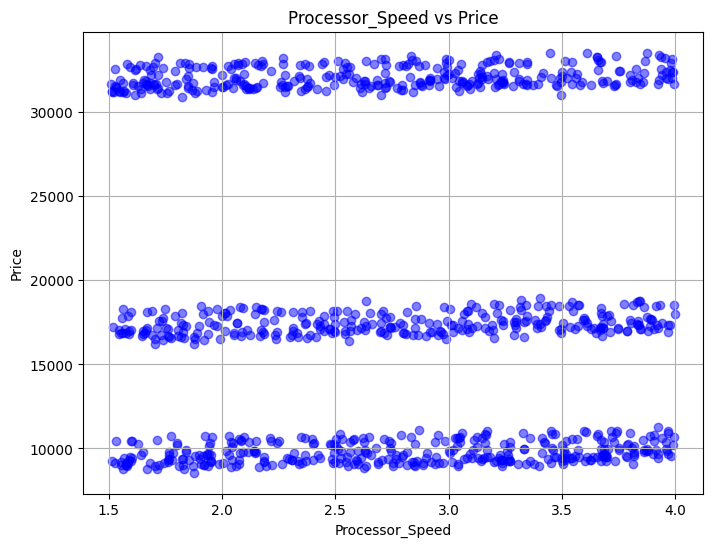

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(laptop['Processor_Speed'], laptop['Price'], color='blue', alpha=0.5)
plt.title('Processor_Speed vs Price')
plt.xlabel('Processor_Speed')
plt.ylabel('Price')
plt.grid(True)
plt.show()

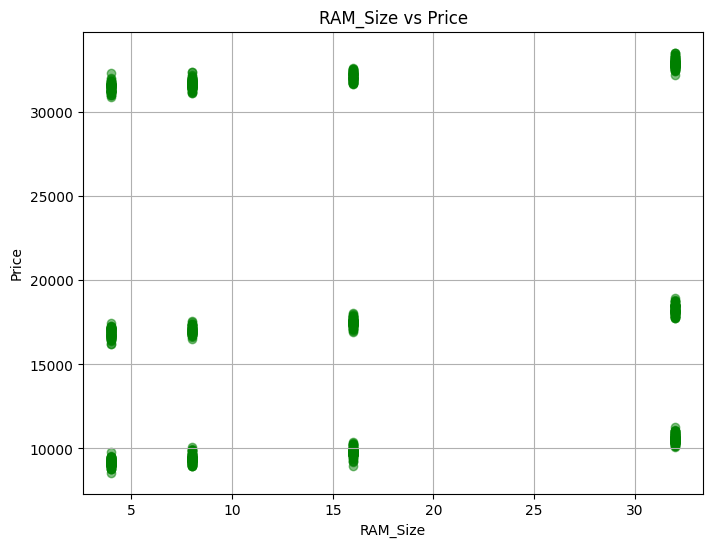

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(laptop['RAM_Size'], laptop['Price'], color='green', alpha=0.5)
plt.title('RAM_Size vs Price')
plt.xlabel('RAM_Size')
plt.ylabel('Price')
plt.grid(True)
plt.show()

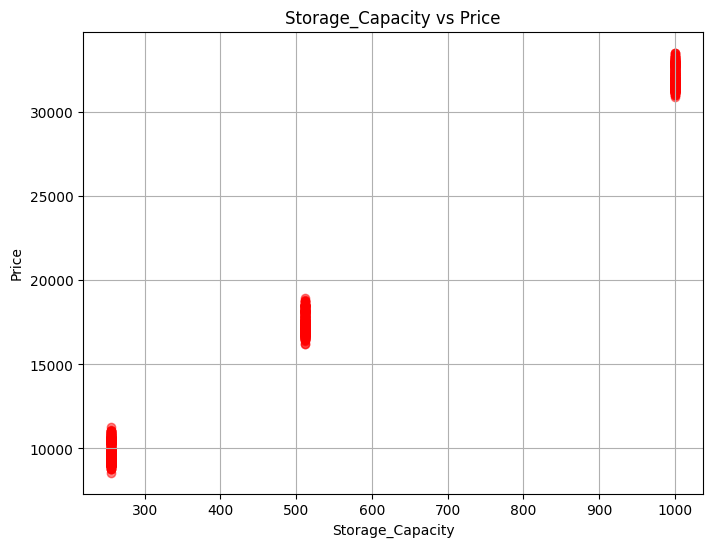

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(laptop['Storage_Capacity'], laptop['Price'], color='red', alpha=0.5)
plt.title('Storage_Capacity vs Price')
plt.xlabel('Storage_Capacity')
plt.ylabel('Price')
plt.grid(True)
plt.show()

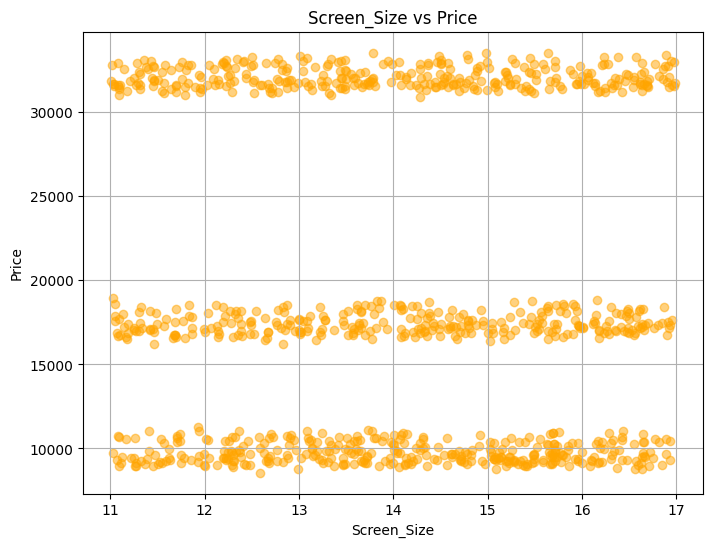

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(laptop['Screen_Size'], laptop['Price'], color='orange', alpha=0.5)
plt.title('Screen_Size vs Price')
plt.xlabel('Screen_Size')
plt.ylabel('Price')
plt.grid(True)
plt.show()

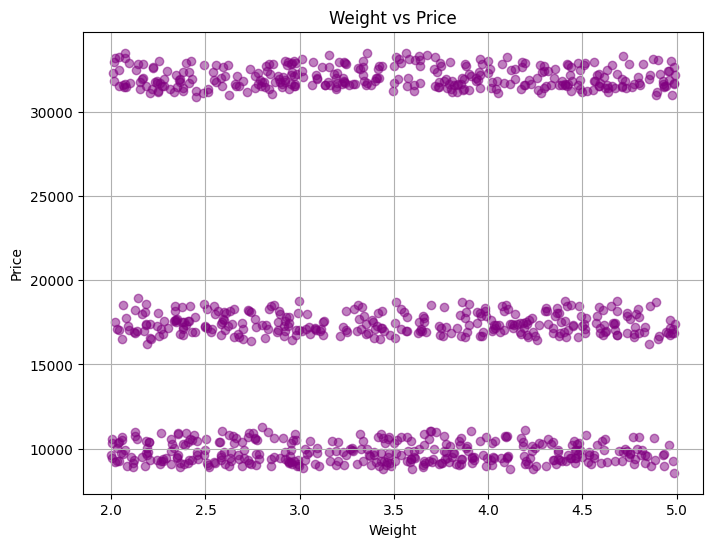

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(laptop['Weight'], laptop['Price'], color='purple', alpha=0.5)
plt.title('Weight vs Price')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
X = laptop.drop('Price', axis=1)
y = laptop['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = laptop.drop(columns=['Price'])
y = laptop['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
base_regressor = DecisionTreeRegressor(max_depth=3)

In [ ]:
adaboost_model = AdaBoostRegressor(base_estimator=base_regressor, n_estimators=50, learning_rate=0.1, loss='linear')


In [ ]:
X_train_encoded = pd.get_dummies(X_train)


In [ ]:
adaboost_model.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1)

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:

  X_test_encoded[col] = 0
X_test_encoded = X_test_encoded[X_train_encoded.columns]
y_pred = adaboost_model.predict(X_test_encoded)






In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for adaboost:", mse)

Mean Squared Error for adaboost: 82945.54438704126


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate Absolute Error (AE)
absolute_error = mean_absolute_error(y_test, y_pred)
print("Absolute Error:", absolute_error)


Absolute Error: 224.79894928203103


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print("Root Mean Squared Error for adaboost:", rmse)


Root Mean Squared Error for adaboost: 288.0026812150214


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_scaled)

# Calculate RMSE (Root Mean Squared Error)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Random Forest RMSE:", rf_rmse)

# Calculate R-squared (R^2) score
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest R-squared (R^2) score:", rf_r2)


Random Forest RMSE: 203.99513053606216
Random Forest R-squared (R^2) score: 0.9995416784796218


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Mean Squared Error (MSE):", rf_mse)


Random Forest Mean Squared Error (MSE): 41614.01328242505


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print("Random Forest Mean Absolute Error (MAE):", rf_mae)


Random Forest Mean Absolute Error (MAE): 167.37633299768754
